In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn

pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [4]:
patch_sklearn()

def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
data_dir = Path("./50cm") 
df1 = pd.read_csv(data_dir / "fft_50_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
df1 = convert(df1)
# df36 = df36[:129*198]

df2 = pd.read_csv(data_dir / "fft_50_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()
df2 = convert(df2)

df3 = pd.read_csv(data_dir / "fft_50_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()
df3 = convert(df3)


data_dir = Path("./1m") 
df4 = pd.read_csv(data_dir / "fft_100_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()
df4 = convert(df4)

# df36 = df36[:129*198]

df5 = pd.read_csv(data_dir / "fft_100_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()
df5 = convert(df5)


df6 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()
df6 = convert(df6)


data_dir = Path("./1.5m") 
df7 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()
df7 = convert(df7)


data_dir = Path("./1.5m") 
df8 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()
df8 = convert(df8)


data_dir = Path("./1.5m") 
df9 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()
df9 = convert(df9)


data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df10 = convert(df10)


data_dir = Path("./2.25m") 
df11 = pd.read_csv(data_dir / "fft_225_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()
df11 = convert(df11)

df12 = pd.read_csv(data_dir / "fft_225_90_Vent2_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]
df12 = df12.dropna()
df12 = convert(df12)

df13 = pd.read_csv(data_dir / "fft_225_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]
df13 = df13.dropna()
df13 = convert(df13)

df14 = pd.read_csv(data_dir / "fft_225_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]
df14 = df14.dropna()
df14 = convert(df14)

#PHONE 2 DATA
# data_dir = Path("./DiverseDataFromPhone2") 
# df11 = pd.read_csv(data_dir / "fft1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df11 = df11[df11['frequency'] != "clocktime"]
# df11 = df11.dropna()

# df12 = pd.read_csv(data_dir / "fft2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df12 = df12[df12['frequency'] != "clocktime"]
# df12 = df12.dropna()

# df13 = pd.read_csv(data_dir / "fft3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df13 = df13[df13['frequency'] != "clocktime"]
# df13 = df13.dropna()

# df14 = pd.read_csv(data_dir / "fft4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df14 = df14[df14['frequency'] != "clocktime"]
# df14 = df14.dropna()

# df15 = pd.read_csv(data_dir / "fft5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df15 = df15[df15['frequency'] != "clocktime"]
# df15 = df15.dropna()

In [20]:
def indices(df):
#     return np.random.choice(df.shape[0], size=2000, replace=False, p=None)
    return df[:2000]

def indicesSmaller(df):
    indices = np.random.choice(df.shape[0], size=400, replace=False, p=None)
    return df[indices, :]

# df1 = df1[indices(df1), :]
# df2 = df2[indices(df2), :]
# df3 = df3[indices(df3), :]
# df4 = df4[indices(df4), :]
# df5 = df5[indices(df5), :]
# df6 = df6[indices(df6), :]
# df7 = df7[indices(df7), :]
# df8 = df8[indices(df8), :]
# df9 = df9[indices(df9), :]
# df10 = df10[indices(df10), :]

df1 = indices(df1)
df2 = indices(df2)
df3 = indices(df3)
df4 = indices(df4)
df5 = indices(df5)
df6 = indices(df6)
df7 = indices(df7)
df8 = indices(df8)
df9 = indices(df9)
df10 = indices(df10)
df11 = indicesSmaller(df11)
df12 = indicesSmaller(df12)
df13 = indicesSmaller(df13)
df14 = indicesSmaller(df14)
#df15 = indicesSmaller(df15)


In [21]:
df = np.concatenate([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14], axis=0)
#df = df1.append([df4])

# New change
np.random.shuffle(df)
print(df.shape)

(21600, 10)


In [22]:
# data_mid = convert(df)

# data_mid = data_mid[data_mid[:, 9].argsort()]  # sort by day
# data_mid.shape

In [23]:
# indices = np.random.choice(np.arange(data_mid.shape[0]), size=10000, replace=False, p=None)
# indice2 = np.concatenate([indices, np.random.choice(np.arange(6000), size=4000, replace=False, p=None)])
# indice3 = np.concatenate([indice2, np.random.choice(np.arange(data_mid.shape[0]-6000, data_mid.shape[0]), size=4000, replace=False, p=None)])
# data = data_mid[indice3, :]


In [81]:
data = df

In [82]:
X = data[:,:-1]

X = X[:, :4]
X.shape

(21600, 4)

In [83]:
X

array([[  2.    ,  93.1053,  23.4579,  62.1484],
       [ 76.    , 108.7155,  40.7724,  45.5755],
       [ 36.    ,  29.0455,  49.4213,  37.1317],
       ...,
       [124.    ,  82.5552, 107.3276,  90.7869],
       [ 56.    ,  19.759 ,  70.1504,  41.6562],
       [116.    ,  39.1674,  39.0652,  83.4938]])

In [84]:
y = data[:, -1]
y.shape


(21600,)

In [85]:
y

array([3.82, 7.01, 4.41, ..., 3.51, 4.41, 5.25])

In [86]:
print (X.shape, y.shape)

(21600, 4) (21600,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from joblib import dump,load
reg = load('Model4flowSense4.joblib')

In [108]:
# # Params
# params = {'n_estimators': 500,
#           'max_depth': 6,
#           'min_samples_split': 5,
#           'learning_rate': 0.2,
#           'loss': 'ls'}

# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(X_train, y_train)

# from joblib import dump,load
# reg = load('PHONE1flowSense.joblib')

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, min_samples_split=5,
                          n_estimators=500)

In [109]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [110]:
print(y_pred[:5])
print(y_test[:5])

[5.3313446  4.49513415 5.52698122 3.81451348 4.00540171]
[4.41 4.06 7.01 7.51 4.06]


In [111]:
print(y_train_pred[:5])
print(y_train[:5])

[ 4.43156925  3.53137923  4.43942926  4.41450046 30.24491461]
[ 4.49  3.15  4.41  3.98 30.78]


In [112]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  4.23758816746002
(4320,)
Test Reg score:  0.9177153145700807


In [113]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.367781416187738
Train Reg score:  0.9930013936750628


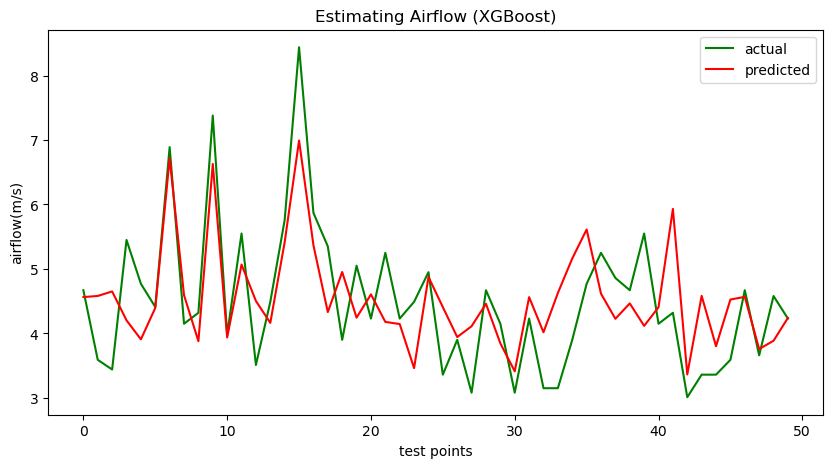

In [934]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")
plt.show()

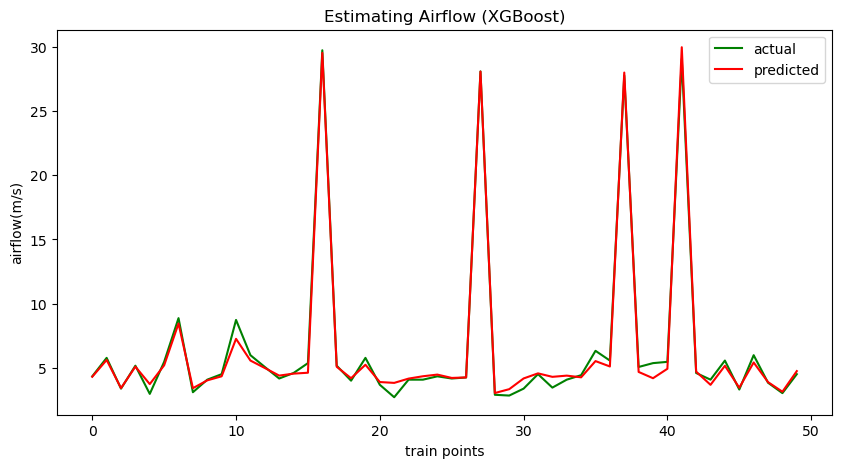

In [935]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")
plt.show()



In [2]:
from joblib import dump,load

#dump(reg, 'Model4flowSense4.joblib')
reg = load('Model4flowSense4.joblib')

Mean Squared Error:  162.3489255590972


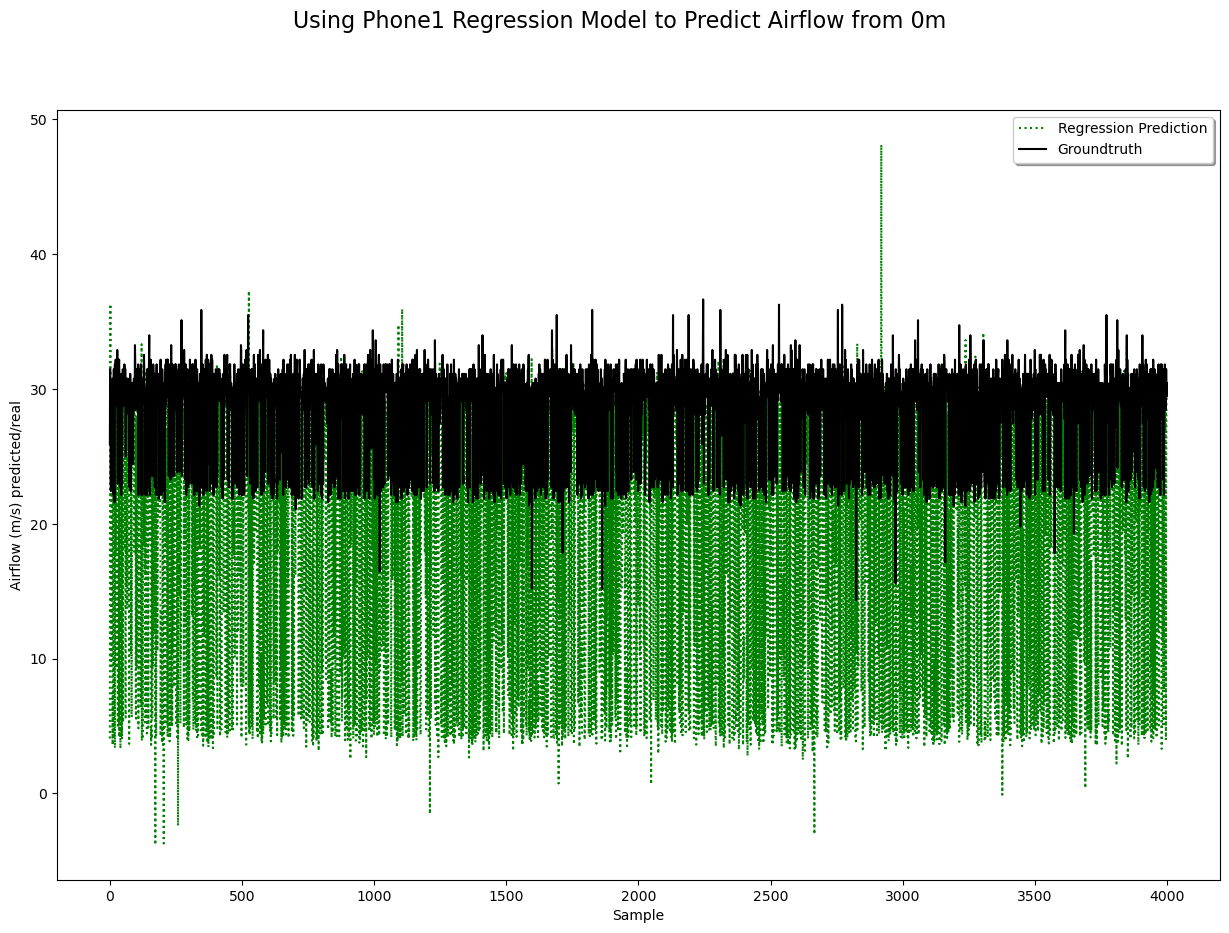

In [938]:
#Looking at predictions from SideVent 0m
data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()

df11 = pd.read_csv(data_dir / "fft_100_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()

df = df10.append([df11])
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  180.68135243451607


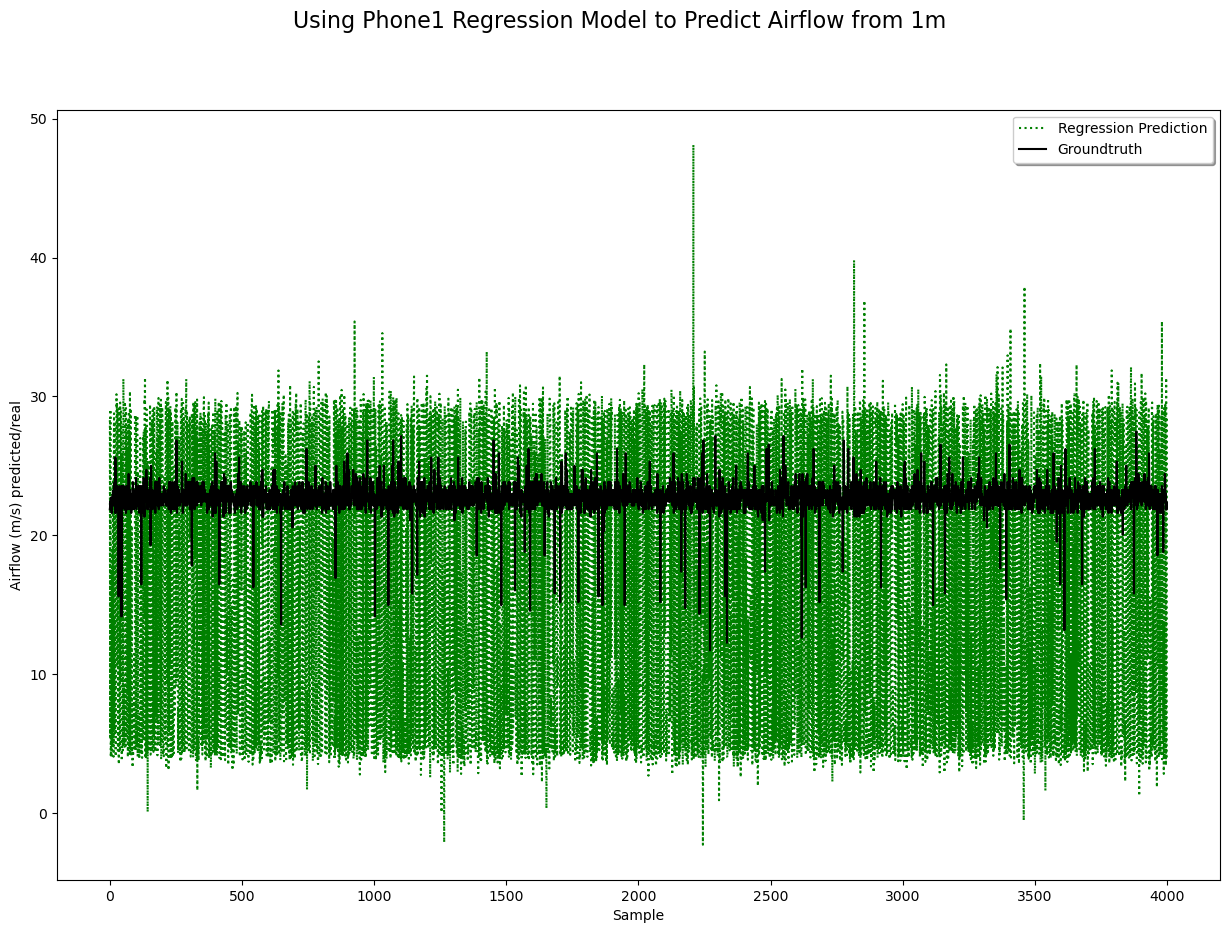

In [939]:
#Looking at predictions from SideVent 1m
data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_100_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df = convert(df10)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [961]:
MSE_scores05 = []
MSE_scores10 = []
MSE_scores15 = []
MSE_scores22 = []

Mean Squared Error:  0.9941658749927261


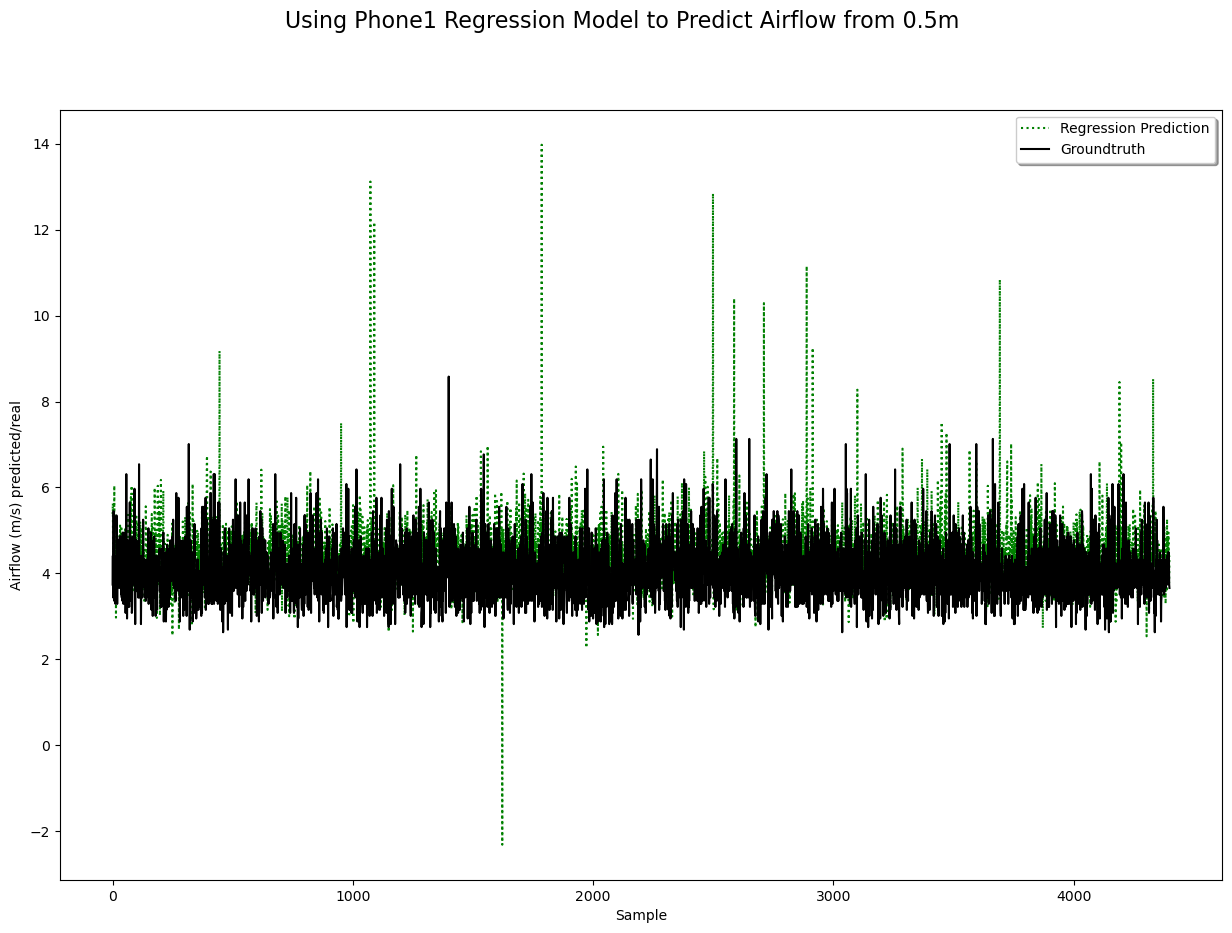

Mean Squared Error:  1.8502151053238833
Mean Squared Error:  0.9478872090601084
Mean Squared Error:  0.8670471846962429
Mean Squared Error:  1.0996638021164613
Mean Squared Error:  1.1292699163233522
[1.8502151053238833, 0.9478872090601084, 0.8670471846962429, 1.0996638021164613, 1.1292699163233522]


In [962]:
#Looking at predictions from 0.5m
data_dir = Path("./50cm") 
df1 = pd.read_csv(data_dir / "fft_50_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
# df36 = df36[:129*198]

df2 = pd.read_csv(data_dir / "fft_50_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_50_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df = df1
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4400, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0.5m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(4400), range(4400,8800), range(8800,13200), range(13200, 17600), range(17600, 22000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))
    MSE_scores05.append(mean_squared_error(reg.predict(X), y))
    
print(MSE_scores05)

Mean Squared Error:  2.1962521042696848


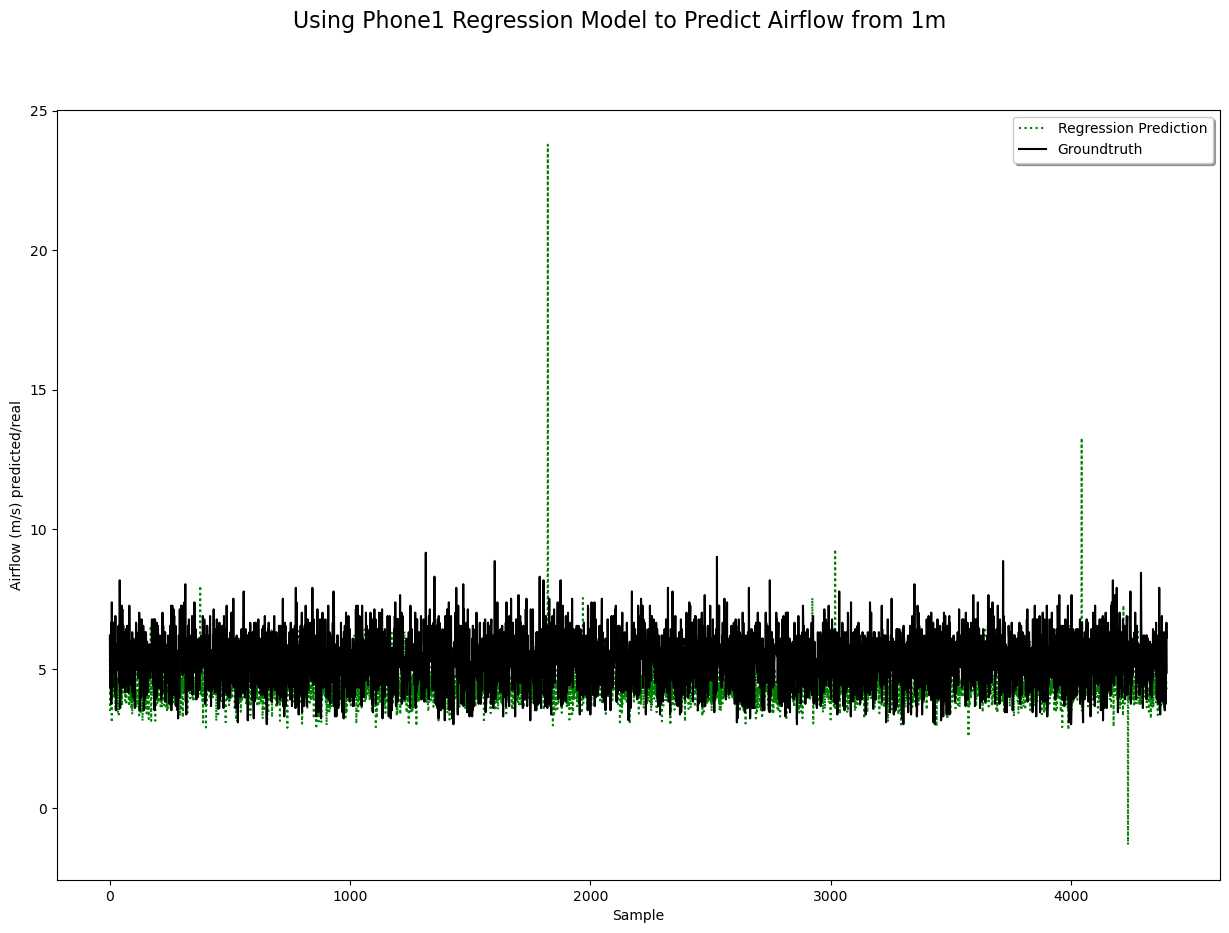

Mean Squared Error:  3.9371851072302766
Mean Squared Error:  1.5429229896206322
Mean Squared Error:  3.111748588647372
Mean Squared Error:  1.834059460550073
Mean Squared Error:  1.1318189023165046
[3.9371851072302766, 1.5429229896206322, 3.111748588647372, 1.834059460550073, 1.1318189023165046]


In [963]:
#Looking at predictions from 1m
data_dir = Path("./1m") 
df4 = pd.read_csv(data_dir / "fft_100_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df5 = pd.read_csv(data_dir / "fft_100_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()

df6 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()

df = df4
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4400, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(4400), range(4400,8800), range(8800,13200), range(13200, 17600), range(17600, 22000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))
    MSE_scores10.append(mean_squared_error(reg.predict(X), y))
    
print(MSE_scores10)

Mean Squared Error:  0.13529783160330408


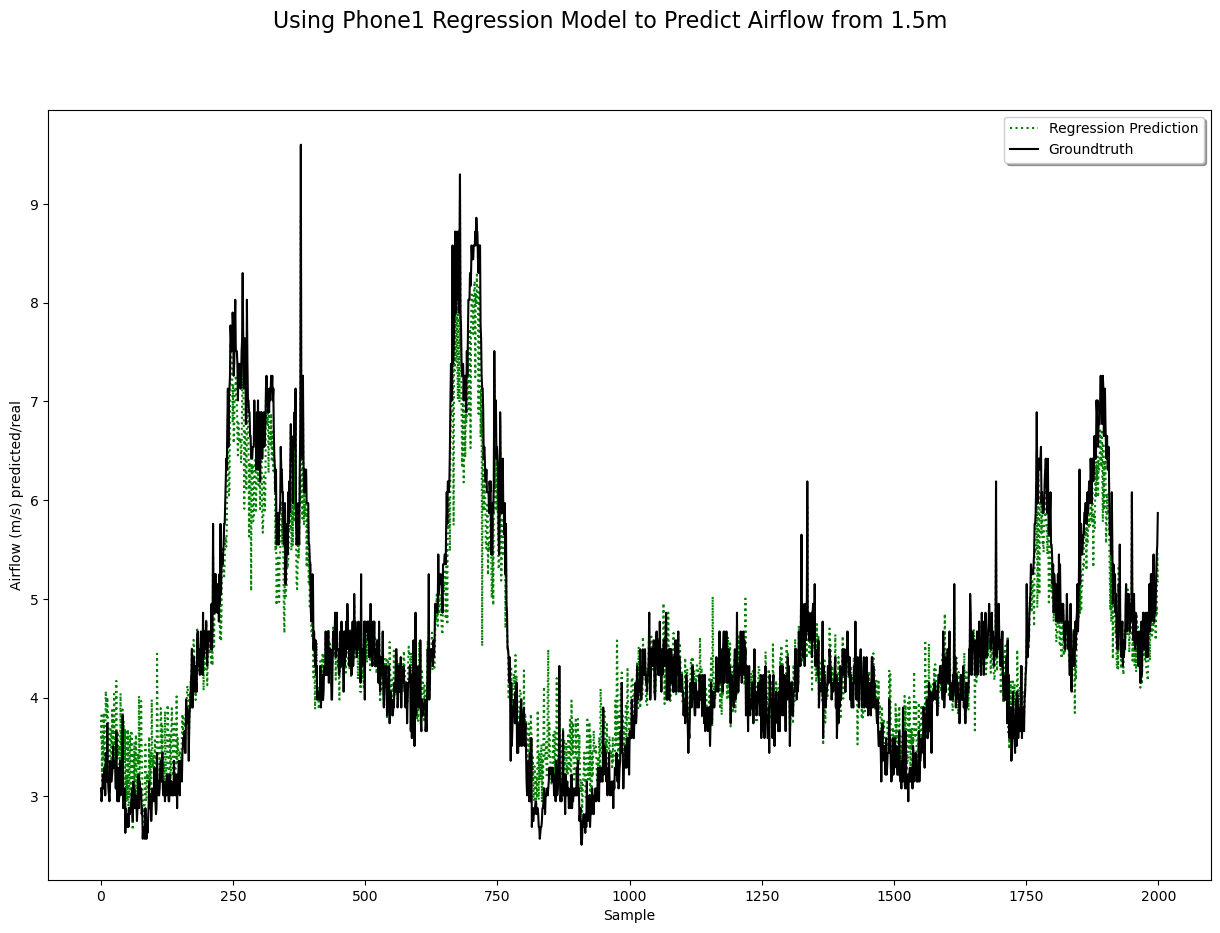

Mean Squared Error:  0.13529783160330408
Mean Squared Error:  4.878935529132186
Mean Squared Error:  2.2954750491653146
Mean Squared Error:  6.212974443304452
Mean Squared Error:  3.581118453262745
[0.13529783160330408, 0.13529783160330408, 4.878935529132186, 2.2954750491653146, 6.212974443304452, 3.581118453262745]


In [964]:
#Looking at predictions from 1.5m
data_dir = Path("./1.5m") 
df7 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()

df8 = pd.read_csv(data_dir / "fft_150_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()

df9 = pd.read_csv(data_dir / "fft_150_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()

df = df7
df = convert(df)
df.shape

indices = range(2000)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))
MSE_scores15.append(mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1.5m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,7000), range(7000,8000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))
    MSE_scores15.append(mean_squared_error(reg.predict(X), y))
    
print(MSE_scores15)

Mean Squared Error:  88.36085354761899


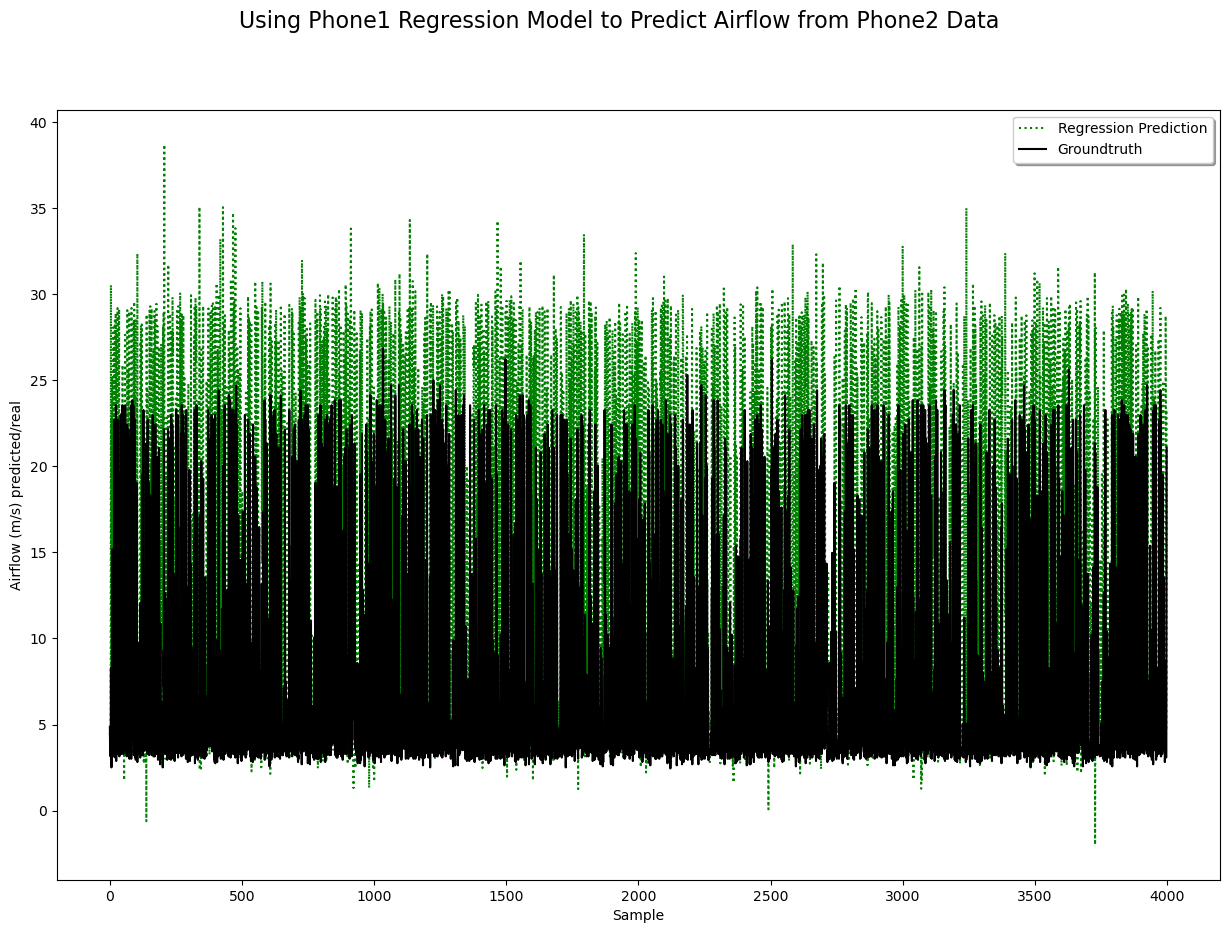

In [965]:
#Looking at predicting values from Phone 2
#PHONE 2 DATA
data_dir = Path("./DiverseDataFromPhone2") 
df11 = pd.read_csv(data_dir / "fft1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()

df12 = pd.read_csv(data_dir / "fft2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]
df12 = df12.dropna()

df13 = pd.read_csv(data_dir / "fft3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]
df13 = df13.dropna()

df14 = pd.read_csv(data_dir / "fft4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]
df14 = df14.dropna()

df15 = pd.read_csv(data_dir / "fft5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15.dropna()

df = df11.append([df12, df13, df14, df15])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[indices,:-1]
X = X[:, :4]
X.shape

y = data_mid[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Phone2 Data', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  1.7445478150267624


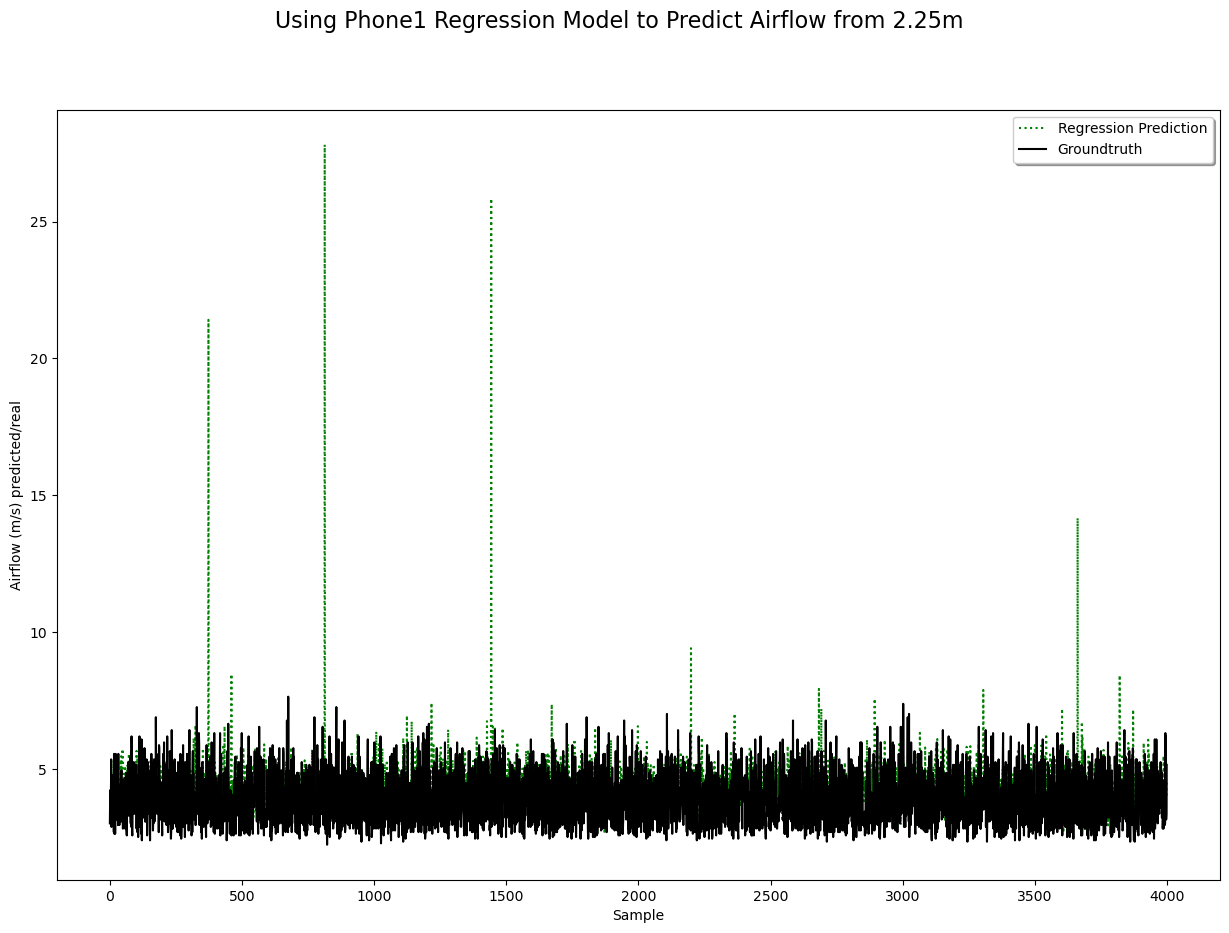

Mean Squared Error:  1.7369381071011363
Mean Squared Error:  1.4884526130665185
Mean Squared Error:  1.570473411961839
Mean Squared Error:  1.716395493485006
Mean Squared Error:  1.2584428367918163
[1.7369381071011363, 1.4884526130665185, 1.570473411961839, 1.716395493485006, 1.2584428367918163]


In [966]:
#Looking at predictions from 2.25m
data_dir = Path("./2.25m") 
df1 = pd.read_csv(data_dir / "fft_225_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df2 = pd.read_csv(data_dir / "fft_225_90_Vent2_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_225_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df4 = pd.read_csv(data_dir / "fft_225_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df = df4
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 2.25m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,7000), range(7000,8000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))
    MSE_scores22.append(mean_squared_error(reg.predict(X), y))
    
print(MSE_scores22)

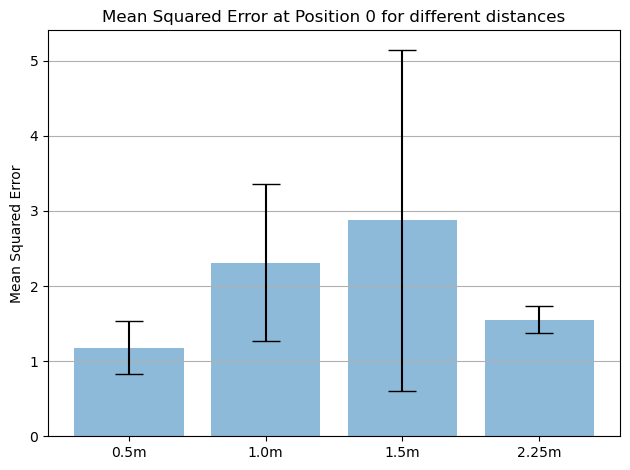

In [967]:
#ERROR BAR GRAPH CODE
# Calculate the average
five_mean = np.mean(MSE_scores05)
one_mean = np.mean(MSE_scores10)
onefive_mean = np.mean(MSE_scores15)
two_mean = np.mean(MSE_scores22)

# Calculate the standard deviation
five_std = np.std(MSE_scores05)
one_std = np.std(MSE_scores10)
onefive_std = np.std(MSE_scores15)
two_std = np.std(MSE_scores22)

# Define labels, positions, bar heights and error bar heights
labels = ['0.5m', '1.0m', '1.5m', '2.25m']
x_pos = np.arange(len(labels))
CTEs = [five_mean, one_mean, onefive_mean, two_mean]
error = [five_std, one_std, onefive_std, two_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Mean Squared Error")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Squared Error at Position 0 for different distances')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Model4_error_bars_MSE_0.png')
plt.show()

Mean Squared Error:  8.203137020947615


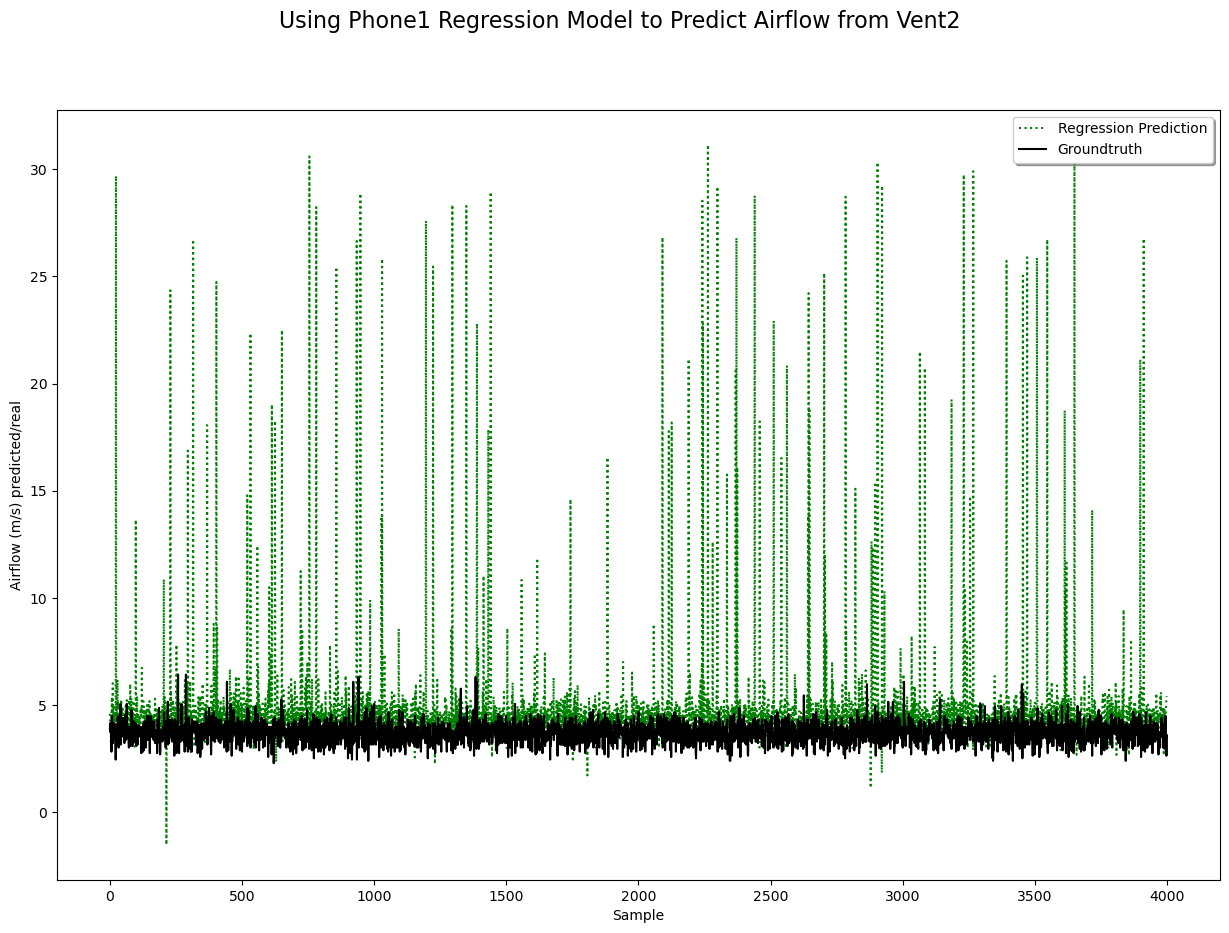

In [983]:
#Looking at predictions from Vent2
data_dir = Path("./Vent2") 
df2 = pd.read_csv(data_dir / "fft_100_0_Vent2_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df = df2
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Vent2', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  5.997157797119878


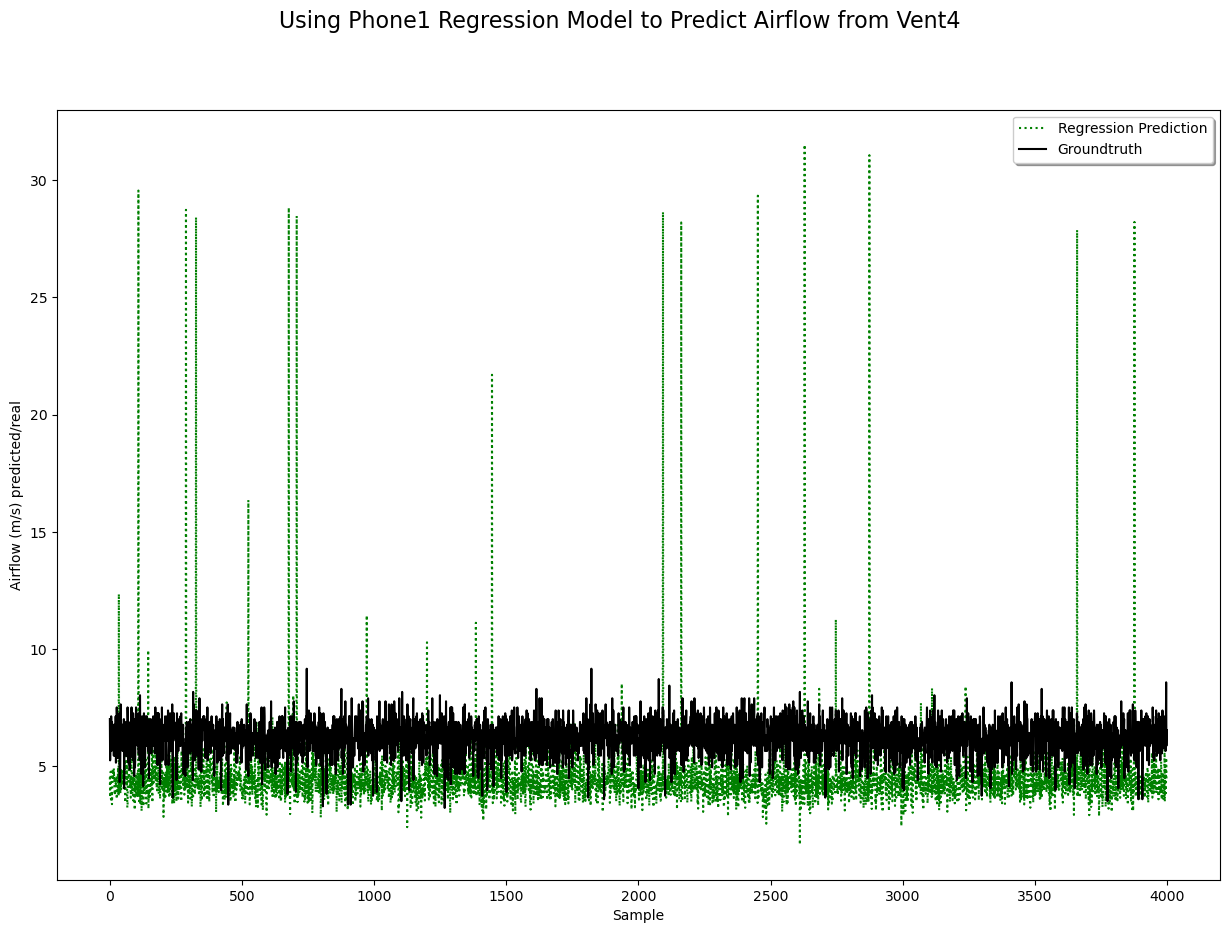

In [984]:
#Looking at predictions from Vent4
data_dir = Path("./Vent4 (CICS)") 
df1 = pd.read_csv(data_dir / "fft_100_0_Vent4_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df = df1
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Vent4', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [987]:
MSE_vent1 = []
MSE_vent2 = []
MSE_vent4 = []

df = df4 #Vent1, at 1 m away and orientation 0
for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,8000), range(8000,10000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_vent1.append(mean_squared_error(reg.predict(X), y))

df = convert(df2) #Vent2
for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,8000), range(8000,10000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_vent2.append(mean_squared_error(reg.predict(X), y))
        
df = convert(df1) #Vent4
for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,8000), range(8000,10000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_vent4.append(mean_squared_error(reg.predict(X), y))

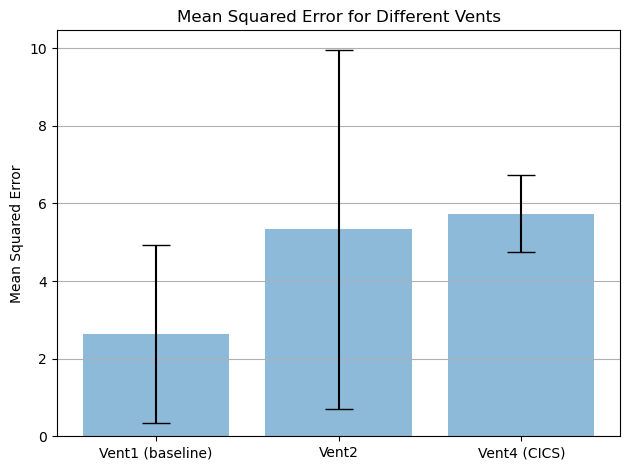

In [988]:
#ERROR BAR GRAPH CODE
# Calculate the average
mean1 = np.mean(MSE_vent1)
mean2 = np.mean(MSE_vent2)
mean4 = np.mean(MSE_vent4)

# Calculate the standard deviation
std1 = np.std(MSE_vent1)
std2 = np.std(MSE_vent2)
std4 = np.std(MSE_vent4)

# Define labels, positions, bar heights and error bar heights
labels = ['Vent1 (baseline)', 'Vent2', 'Vent4 (CICS)']
x_pos = np.arange(len(labels))
CTEs = [mean1,mean2,mean4]
error = [std1,std2,std4]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Mean Squared Error")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Squared Error for Different Vents')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Model4_error_bars_MSE_OTHERVENTS.png')
plt.show()

[[ 18.          17.8039      95.631      ... 170.           0.
   20.71206225]
 [ 14.          16.3321      10.1966     ...  38.           0.
   14.87352682]
 [ 28.          60.7132      52.6777     ...  48.           0.
   15.64560916]
 ...
 [152.         144.0273      79.4264     ...  44.           0.
   29.15085275]
 [190.         207.7523      27.5855     ...  38.           0.
   31.60454821]
 [216.         229.1362      24.0889     ... 148.           0.
   32.17569551]]
Mean Squared Error:  161.80923504973708


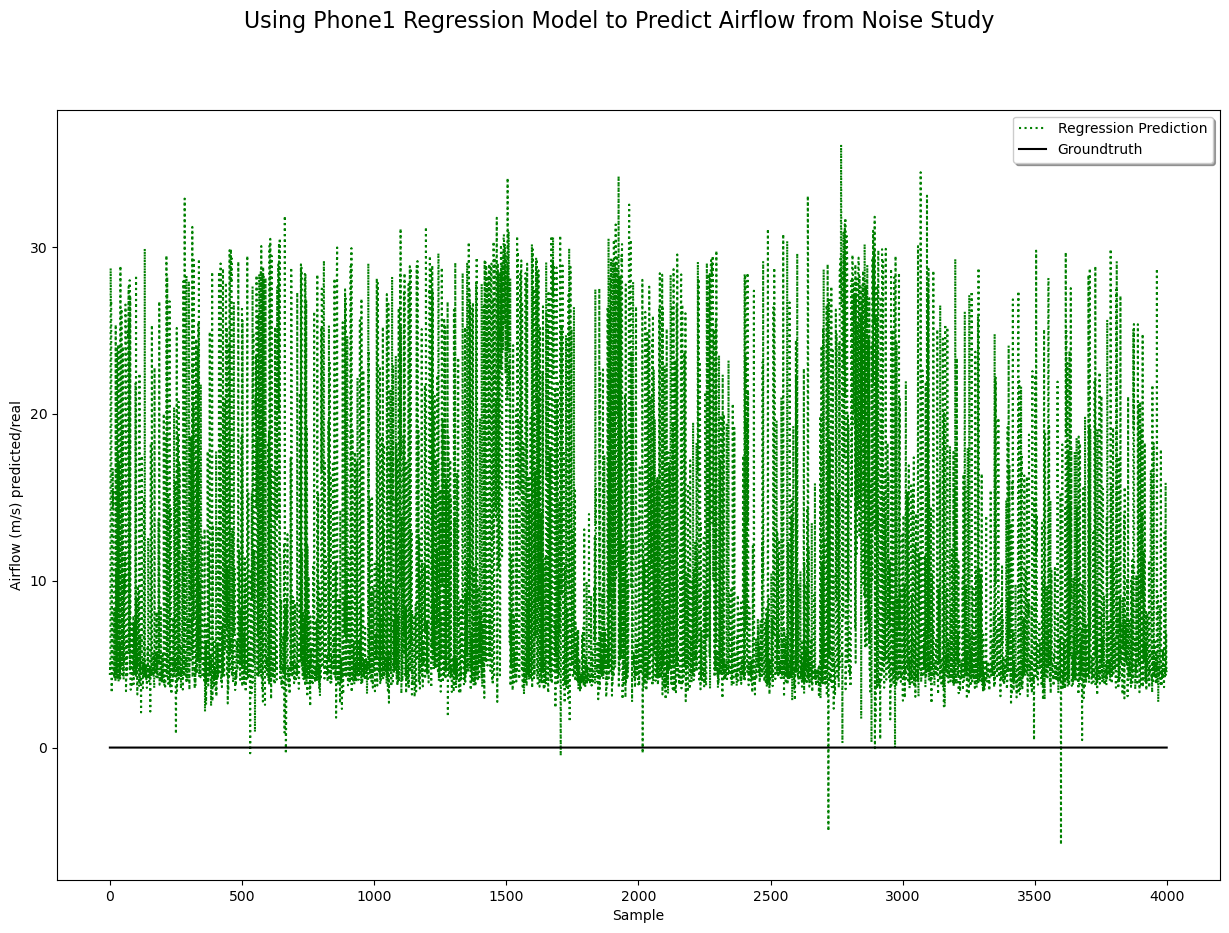

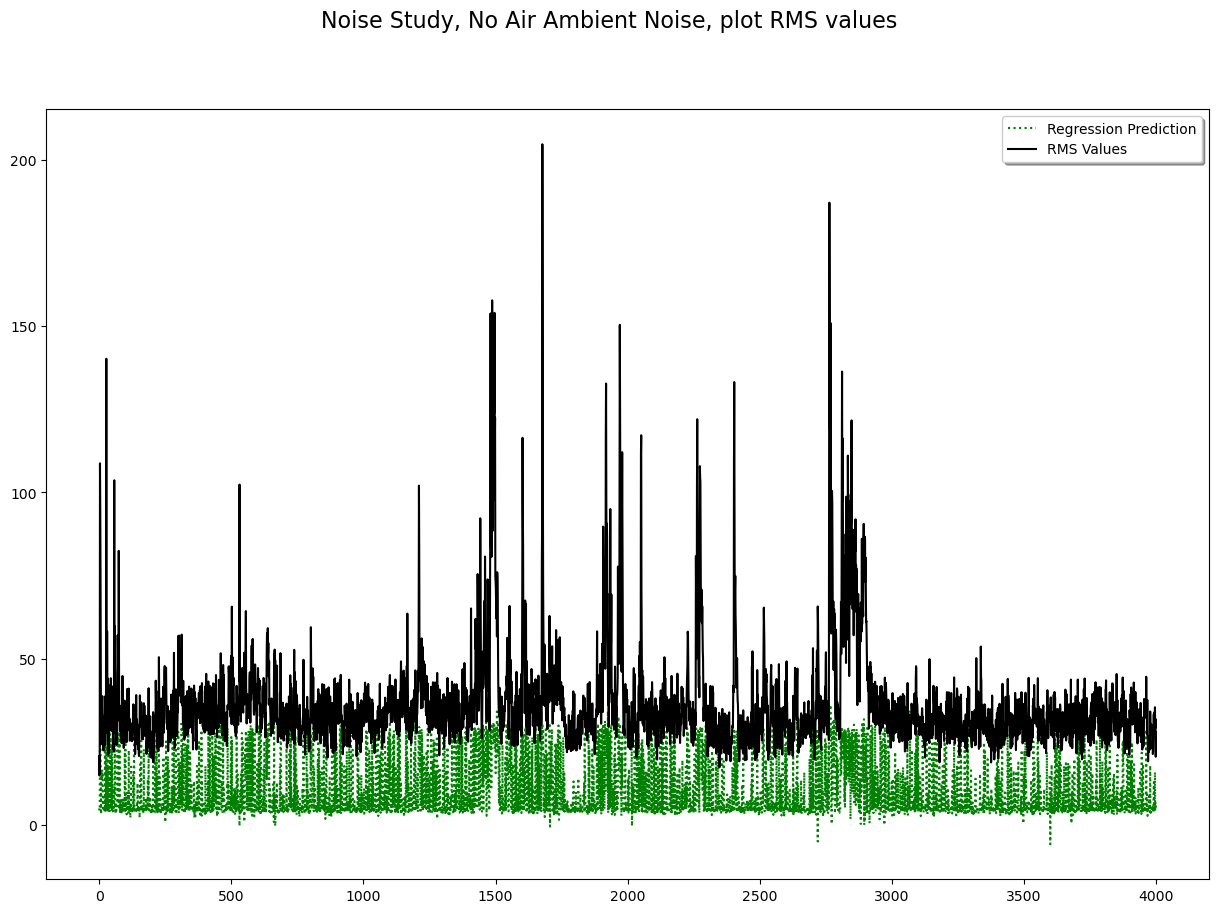

In [18]:
from pathlib import Path

#Looking at predictions from Noise Study
data_dir = Path("./Noise-Study") 
df1 = pd.read_csv(data_dir / "fft_225_90_Vent1_30.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df2 = pd.read_csv(data_dir / "fft_225_90_Vent1_60.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_225_90_Vent1_90.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df4 = pd.read_csv(data_dir / "fft_225_90_Vent1_50Crowd.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df5 = pd.read_csv(data_dir / "fft_225_90_Vent1_50Vacuum.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()

data_dir = Path("./NoAir-Data")
df6 = pd.read_csv(data_dir / "fftNoAirAmbient.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()

df = df6
df = convert(df, frame_size=11)
print(df)

indices = range(4000)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

y = df[indices, -2]
y.shape

rms = df[indices, -1]
rms.shape
    
print("Mean Squared Error: ", mean_squared_error(reg.predict(X), y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Noise Study', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Noise Study, No Air Ambient Noise, plot RMS values', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(rms, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'RMS Values'), loc='upper right', shadow=True)
plt.show()

MSE_30 = []
MSE_60 = []
MSE_90 = []
MSE_Crowd = []
MSE_Vacuum = []

In [116]:
df = convert(df1)
for indices in [range(4000,5000), range(5000,6000), range(6000,7000), range(8000,9000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_30.append(mean_squared_error(reg.predict(X), y))
        
df = convert(df2)
for indices in [range(4000,5000), range(5000,6000), range(6000,7000), range(8000,9000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_60.append(mean_squared_error(reg.predict(X), y))
    
df = convert(df3)
for indices in [range(4000,5000), range(5000,6000), range(6000,7000), range(8000,9000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_90.append(mean_squared_error(reg.predict(X), y))
    
df = convert(df4)
for indices in [range(4000,5000), range(5000,6000), range(6000,7000), range(8000,9000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_Crowd.append(mean_squared_error(reg.predict(X), y))
    
df = convert(df5)
for indices in [range(1000), range(1000,2000), range(2000,3000), range(3000,4000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    y = df[indices, -1]
    MSE_Vacuum.append(mean_squared_error(reg.predict(X), y))

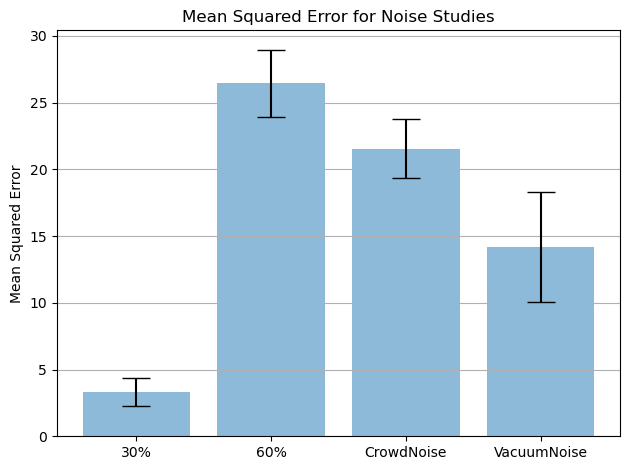

In [117]:
#ERROR BAR GRAPH CODE
# Calculate the average
mean30 = np.mean(MSE_30)
mean60 = np.mean(MSE_60)
meanCrowd = np.mean(MSE_Crowd)
meanVacuum = np.mean(MSE_Vacuum)

# Calculate the standard deviation
std30 = np.std(MSE_30)
std60 = np.std(MSE_60)
stdCrowd = np.std(MSE_Crowd)
stdVacuum = np.std(MSE_Vacuum)

# Define labels, positions, bar heights and error bar heights
labels = ['30%', '60%', 'CrowdNoise', 'VacuumNoise']
x_pos = np.arange(len(labels))
CTEs = [mean30,mean60,meanCrowd,meanVacuum]
error = [std30,std60,stdCrowd,stdVacuum]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Mean Squared Error")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Squared Error for Noise Studies')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Model4_error_bars_MSE_NOISESTUDY.png')
plt.show()